# UCI Superconductivity dataset EDA

Тази извадка се състои от 2 файла. В първия файл (train.csv) са описани 81 характеристики на 21263 свръхпроводника плюс тяхната критична температура в 82-рата колона. 
<br>Критичната температура е температурата, под която материала губи своето съпротивление и се превръща в идеален проводник.
<br>Във втория файл (unique_m.csv) се съдържа разбивка на химичната формула на свръхпроводниците, като в последните две колони са критичната температура и цялата химична формула на материала.
<br>Целта на извадката е предвиждането на критичната температура в зависимост от подадените характеристики.

## Зареждане на данните

Ще използвам <u>numpy</u> и <u>pandas</u> библиотеките за зареждане и обработка на данните:

In [1]:
import numpy as np
import pandas as pd
np.__version__, pd.__version__

('1.20.3', '1.3.4')

И двата файла са във формат .csv, затова ще ги заредя с <u>pandas</u>

In [2]:
supcon_train = pd.read_csv('./data/train.csv')
supcon_unique = pd.read_csv('./data/unique_m.csv')

In [3]:
type(supcon_train), type(supcon_unique)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

## Изследователски анализ на данните:

Ще проверя как изглеждат първите 5 реда от извадките, последните 5 и произволни 5 реда.
<br>Това ще ми даде информация, как изглеждат данните, дали са сортирани по някакъв начин и евентуално за реда им на въвеждане в извадката.

In [4]:
supcon_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
supcon_train.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.500000,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80


In [6]:
supcon_train.sample(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
13499,5,81.789084,52.455777,45.923551,30.415334,1.211225,1.376977,154.11932,17.562683,69.089853,...,2.833333,2.930156,2.749459,1.586785,1.476901,2,0.750000,0.632456,0.687184,5.900
11727,2,122.106550,87.051325,99.972668,72.098466,0.517790,0.687725,140.22090,9.057175,70.110450,...,6.000000,6.000000,6.000000,0.693147,0.562335,0,3.000000,0.000000,0.000000,0.168
1963,7,109.666543,59.612057,80.704606,36.142156,1.710617,1.696606,192.98100,20.219738,72.506880,...,2.383852,2.667097,2.256668,1.874063,1.534747,3,1.033752,1.124858,0.961663,87.000
8298,6,93.410967,102.254475,68.968336,78.547932,1.544257,1.330097,192.98100,50.245175,65.450357,...,2.800000,2.492883,2.566372,1.717076,1.504593,3,1.100000,1.105542,1.288410,68.600
6344,5,89.337180,54.095572,70.560647,36.213505,1.444537,1.422700,124.90825,18.111808,46.917667,...,2.118017,2.491462,2.088332,1.564957,1.318926,2,0.937844,0.800000,0.427513,4.000


In [7]:
supcon_unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [8]:
supcon_unique.tail()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31
21262,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,12.80,Fe1Se0.2Te0.8


In [9]:
supcon_unique.sample(5)

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
13973,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,15.9,Nb3Al0.5Ge0.5
6502,0.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0,...,0.0,0.0,0.0,0.0,2.0,0,0,0,77.1,Bi2Sr2Ca0.875Y0.125Cu2O8
13827,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,16.5,Nb0.75Al0.2Ge0.05
18073,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,15.5,Pr0.85Sr0.15Fe1As1O1
7029,0.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,52.5,Y0.5Pr0.5Ba2Cu4O8


Не се забелязва някакво сортиране или ред на въвеждане. 
<br> В първия файл имаме физични характеристики на материала, а във втория по колоните са атомите от Менделеевата таблица, а като стойност в колоната е броя от съответния атом в дадения материал, чиято цяла формула е дадена в последната колона.

In [10]:
supcon_train.shape, supcon_unique.shape

((21263, 82), (21263, 88))

In [11]:
supcon_train.ndim, supcon_unique.ndim

(2, 2)

Еднакъв брой редове, 2 дименсии (ред,колона)

In [12]:
supcon_train.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [13]:
supcon_unique.columns

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')

Очевидно не присъстват всички елементи, а само тези които са открити в свърхпроводници.

In [14]:
supcon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

Във файла с физичните характеристики нямаме празни стойности и 3 от колоните са с цели числа: броя елементи, антомния радиус и валентността.

In [15]:
supcon_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

И тук нямаме празни стойности и всъщност където даден елемент не присъства във формулата на материала вместо NULL имаме 0.
<br> Прави впечатление, че 9 от колоните са цели числя а другите 78 са реални.
<br><br> Стандартните статистически характеристики може да видим с функцията <b>describe()</b>, като резултата е транспониран за прегледност.
<br> За да мога да видя всички редове и колони, ще се наложи да променя <u>pandas</u> опциите дефиниращи максималния брой показвани редове и колони, които в случая са:

In [16]:
pd.get_option("display.max_columns")

20

In [17]:
pd.get_option("display.max_rows")

60

In [18]:
pd.set_option("display.max_columns", None)

In [19]:
pd.set_option("display.max_rows", None)

In [20]:
supcon_train.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.000000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.980400
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.980400
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.980400
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.980400
entropy_atomic_mass,21263.0,1.165608,0.364930,0.000000,0.966676,1.199541,1.444537,1.983797
wtd_entropy_atomic_mass,21263.0,1.063884,0.401423,0.000000,0.775363,1.146783,1.359418,1.958203
range_atomic_mass,21263.0,115.601251,54.626887,0.000000,78.512902,122.906070,154.119320,207.972460
wtd_range_atomic_mass,21263.0,33.225218,26.967752,0.000000,16.824174,26.636008,38.356908,205.589910
std_atomic_mass,21263.0,44.391893,20.035430,0.000000,32.890369,45.123500,59.322812,101.019700


За следващия файл ще включа параметъра 'all' за да видя и единствената категорийна характеристика, а именно цялата химична формула на материала:

In [21]:
supcon_unique.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
H,21263.0,NaN,NaN,NaN,0.017685,0.26722,0.0,0.0,0.0,0.0,14.0
He,21263.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Li,21263.0,NaN,NaN,NaN,0.012125,0.129552,0.0,0.0,0.0,0.0,3.0
Be,21263.0,NaN,NaN,NaN,0.034638,0.848541,0.0,0.0,0.0,0.0,40.0
B,21263.0,NaN,NaN,NaN,0.142594,1.044486,0.0,0.0,0.0,0.0,105.0
C,21263.0,NaN,NaN,NaN,0.384968,4.408032,0.0,0.0,0.0,0.0,120.0
N,21263.0,NaN,NaN,NaN,0.013284,0.150427,0.0,0.0,0.0,0.0,12.8
O,21263.0,NaN,NaN,NaN,3.009129,3.811649,0.0,0.0,1.0,6.8,66.0
F,21263.0,NaN,NaN,NaN,0.014874,0.132119,0.0,0.0,0.0,0.0,4.0
Ne,21263.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Интересното тук е, че имаме 15542 уникални материала от 21263 в извадката. Изглежда че имаме и 9 колони в които всички редове са нули.

## Преименуване на колони

Колоните от train файла са само с малки букви. Ще ги променя, така че всички букви да бъдат главни, като използвам dataframe функцията за преименуване на осите rename(), с параметри: желаната трансформация, ос върху която да се извърши и inplace=True параметъра за да се извърши върху текущия дейтафрейм. 

In [22]:
supcon_train.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [23]:
supcon_train.rename(str.upper, axis='columns', inplace=True)

In [24]:
supcon_train.columns

Index(['NUMBER_OF_ELEMENTS', 'MEAN_ATOMIC_MASS', 'WTD_MEAN_ATOMIC_MASS',
       'GMEAN_ATOMIC_MASS', 'WTD_GMEAN_ATOMIC_MASS', 'ENTROPY_ATOMIC_MASS',
       'WTD_ENTROPY_ATOMIC_MASS', 'RANGE_ATOMIC_MASS', 'WTD_RANGE_ATOMIC_MASS',
       'STD_ATOMIC_MASS', 'WTD_STD_ATOMIC_MASS', 'MEAN_FIE', 'WTD_MEAN_FIE',
       'GMEAN_FIE', 'WTD_GMEAN_FIE', 'ENTROPY_FIE', 'WTD_ENTROPY_FIE',
       'RANGE_FIE', 'WTD_RANGE_FIE', 'STD_FIE', 'WTD_STD_FIE',
       'MEAN_ATOMIC_RADIUS', 'WTD_MEAN_ATOMIC_RADIUS', 'GMEAN_ATOMIC_RADIUS',
       'WTD_GMEAN_ATOMIC_RADIUS', 'ENTROPY_ATOMIC_RADIUS',
       'WTD_ENTROPY_ATOMIC_RADIUS', 'RANGE_ATOMIC_RADIUS',
       'WTD_RANGE_ATOMIC_RADIUS', 'STD_ATOMIC_RADIUS', 'WTD_STD_ATOMIC_RADIUS',
       'MEAN_DENSITY', 'WTD_MEAN_DENSITY', 'GMEAN_DENSITY',
       'WTD_GMEAN_DENSITY', 'ENTROPY_DENSITY', 'WTD_ENTROPY_DENSITY',
       'RANGE_DENSITY', 'WTD_RANGE_DENSITY', 'STD_DENSITY', 'WTD_STD_DENSITY',
       'MEAN_ELECTRONAFFINITY', 'WTD_MEAN_ELECTRONAFFINITY',
       'GMEAN_

## Задаване на подходящ индекс по редове:

В момента и в двата файла имаме автоматичен индекс. В <b>unique</b> файла в <b>material</b> имаме дублирани стойности, но все пак тя е подходяща да стане част от един мулти индекс. За целта ще използвам автоматично генерирания индекс и <b>material</b> колоната. Резултата ще запиша в нов дейтафрейм: su_df:

In [25]:
supcon_unique.index

RangeIndex(start=0, stop=21263, step=1)

In [26]:
id_n = supcon_unique.index

In [27]:
id_n.values

array([    0,     1,     2, ..., 21260, 21261, 21262], dtype=int64)

In [28]:
su_df = supcon_unique.set_index([id_n, 'material'])

In [29]:
su_df.sample(5)

,,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
,material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20692,Ce1Fe0.93Co0.07As1H1,1.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.93,0.07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0
3381,Hg1Ba2Ca2Cu3O,0.0,0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,133.0
4112,Y1Ba2Cu3O6.54,0.0,0,0.0,0.0,0.0,0.0,0.0,6.54,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,54.9
13261,Nb0.88V0.12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.12,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,5.7
17064,Ga9Rh2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.9


In [30]:
supcon_unique.sample(5)

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
18209,0.0,0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.00,0.00,0.0,0.0,0.8,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,7.0,La1Fe1As0.8P0.2O1
9621,0.0,0,0.0,0.0,0.0,0.0,0.0,7.80,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,2.20,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,43.0,Ru0.8Sr2Y1Cu2.2O7.8
19803,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.175,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.00,0.00,0.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.825,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,10.0,Ba0.825K0.175Fe2As2
13006,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,12.6,Nb3Al0.5Ge0.5
8552,0.0,0,0.0,0.0,0.0,0.0,0.0,6.94,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,2.94,0.03,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,76.0,Er1Ba2Cu2.94Zn0.03Fe0.03O6.94


In [31]:
su_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
H,21263.0,0.017685,0.267220,0.00000,0.000,0.0,0.000,14.00000
He,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000
Li,21263.0,0.012125,0.129552,0.00000,0.000,0.0,0.000,3.00000
Be,21263.0,0.034638,0.848541,0.00000,0.000,0.0,0.000,40.00000
B,21263.0,0.142594,1.044486,0.00000,0.000,0.0,0.000,105.00000
C,21263.0,0.384968,4.408032,0.00000,0.000,0.0,0.000,120.00000
N,21263.0,0.013284,0.150427,0.00000,0.000,0.0,0.000,12.80000
O,21263.0,3.009129,3.811649,0.00000,0.000,1.0,6.800,66.00000
F,21263.0,0.014874,0.132119,0.00000,0.000,0.0,0.000,4.00000
Ne,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000


От горната справка изглежда, че стойностите за хелий (He) за всички свръхпроводници е 0.00. Ще направя проверка дали това е така:

In [32]:
su_df[su_df['He'] != 0.00]

,,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
,material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Промяна на стойностите в колона:

Понеже колона <b>He</b> съдържа само 0.00, ще я променя на 10, като за целта ще използвам loc функцията с условие:

In [33]:
su_df.loc[(su_df.He == 0.00), 'He'] = 10

In [34]:
su_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
H,21263.0,0.017685,0.267220,0.00000,0.000,0.0,0.000,14.00000
He,21263.0,10.000000,0.000000,10.00000,10.000,10.0,10.000,10.00000
Li,21263.0,0.012125,0.129552,0.00000,0.000,0.0,0.000,3.00000
Be,21263.0,0.034638,0.848541,0.00000,0.000,0.0,0.000,40.00000
B,21263.0,0.142594,1.044486,0.00000,0.000,0.0,0.000,105.00000
C,21263.0,0.384968,4.408032,0.00000,0.000,0.0,0.000,120.00000
N,21263.0,0.013284,0.150427,0.00000,0.000,0.0,0.000,12.80000
O,21263.0,3.009129,3.811649,0.00000,0.000,1.0,6.800,66.00000
F,21263.0,0.014874,0.132119,0.00000,0.000,0.0,0.000,4.00000
Ne,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000


## Премахване на излишна колона

Колоната <b>He</b> съдържа константа стойност и то вече променена, затова ще я премахна: 

In [35]:
su_df.drop(columns='He', inplace=True)

In [36]:
su_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
H,21263.0,0.017685,0.267220,0.00000,0.000,0.0,0.000,14.00000
Li,21263.0,0.012125,0.129552,0.00000,0.000,0.0,0.000,3.00000
Be,21263.0,0.034638,0.848541,0.00000,0.000,0.0,0.000,40.00000
B,21263.0,0.142594,1.044486,0.00000,0.000,0.0,0.000,105.00000
C,21263.0,0.384968,4.408032,0.00000,0.000,0.0,0.000,120.00000
N,21263.0,0.013284,0.150427,0.00000,0.000,0.0,0.000,12.80000
O,21263.0,3.009129,3.811649,0.00000,0.000,1.0,6.800,66.00000
F,21263.0,0.014874,0.132119,0.00000,0.000,0.0,0.000,4.00000
Ne,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000
Na,21263.0,0.008892,0.101685,0.00000,0.000,0.0,0.000,4.00000


Колона <b>He</b> вече не присъства в дейтафрейм <b>su_df</b>.

#### Ще запиша променените дейтафреймове в два нови файла:

In [37]:
su_df.to_csv('./data/YG_unique_m.csv')

In [38]:
supcon_train.to_csv('./data/YG_train.csv')

Забелязва се че unique_m файлът, въпреки премахнатата колона има почти двоен размер. 
<br> Предполагам това се дължи на мулти индексът.

## Описателните статистики на новите дейтасетове са:

In [39]:
supcon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NUMBER_OF_ELEMENTS               21263 non-null  int64  
 1   MEAN_ATOMIC_MASS                 21263 non-null  float64
 2   WTD_MEAN_ATOMIC_MASS             21263 non-null  float64
 3   GMEAN_ATOMIC_MASS                21263 non-null  float64
 4   WTD_GMEAN_ATOMIC_MASS            21263 non-null  float64
 5   ENTROPY_ATOMIC_MASS              21263 non-null  float64
 6   WTD_ENTROPY_ATOMIC_MASS          21263 non-null  float64
 7   RANGE_ATOMIC_MASS                21263 non-null  float64
 8   WTD_RANGE_ATOMIC_MASS            21263 non-null  float64
 9   STD_ATOMIC_MASS                  21263 non-null  float64
 10  WTD_STD_ATOMIC_MASS              21263 non-null  float64
 11  MEAN_FIE                         21263 non-null  float64
 12  WTD_MEAN_FIE      

In [40]:
supcon_train.describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBER_OF_ELEMENTS,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.000000
MEAN_ATOMIC_MASS,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.980400
WTD_MEAN_ATOMIC_MASS,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.980400
GMEAN_ATOMIC_MASS,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.980400
WTD_GMEAN_ATOMIC_MASS,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.980400
ENTROPY_ATOMIC_MASS,21263.0,1.165608,0.364930,0.000000,0.966676,1.199541,1.444537,1.983797
WTD_ENTROPY_ATOMIC_MASS,21263.0,1.063884,0.401423,0.000000,0.775363,1.146783,1.359418,1.958203
RANGE_ATOMIC_MASS,21263.0,115.601251,54.626887,0.000000,78.512902,122.906070,154.119320,207.972460
WTD_RANGE_ATOMIC_MASS,21263.0,33.225218,26.967752,0.000000,16.824174,26.636008,38.356908,205.589910
STD_ATOMIC_MASS,21263.0,44.391893,20.035430,0.000000,32.890369,45.123500,59.322812,101.019700


In [41]:
su_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21263 entries, (0, 'Ba0.2La1.8Cu1O4') to (21262, 'Fe1Se0.2Te0.8')
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   Li             21263 non-null  float64
 2   Be             21263 non-null  float64
 3   B              21263 non-null  float64
 4   C              21263 non-null  float64
 5   N              21263 non-null  float64
 6   O              21263 non-null  float64
 7   F              21263 non-null  float64
 8   Ne             21263 non-null  int64  
 9   Na             21263 non-null  float64
 10  Mg             21263 non-null  float64
 11  Al             21263 non-null  float64
 12  Si             21263 non-null  float64
 13  P              21263 non-null  float64
 14  S              21263 non-null  float64
 15  Cl             21263 non-null  float64
 16  Ar             21263 non-null  int64  
 17  K         

In [42]:
su_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
H,21263.0,0.017685,0.267220,0.00000,0.000,0.0,0.000,14.00000
Li,21263.0,0.012125,0.129552,0.00000,0.000,0.0,0.000,3.00000
Be,21263.0,0.034638,0.848541,0.00000,0.000,0.0,0.000,40.00000
B,21263.0,0.142594,1.044486,0.00000,0.000,0.0,0.000,105.00000
C,21263.0,0.384968,4.408032,0.00000,0.000,0.0,0.000,120.00000
N,21263.0,0.013284,0.150427,0.00000,0.000,0.0,0.000,12.80000
O,21263.0,3.009129,3.811649,0.00000,0.000,1.0,6.800,66.00000
F,21263.0,0.014874,0.132119,0.00000,0.000,0.0,0.000,4.00000
Ne,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000
Na,21263.0,0.008892,0.101685,0.00000,0.000,0.0,0.000,4.00000


За да видим и идекса:

In [43]:
su_df.head()

,,H,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
,material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Ba0.2La1.8Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,Ba0.1La1.9Ag0.1Cu0.9O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,Ba0.1La1.9Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,Ba0.15La1.85Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,Ba0.3La1.7Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


## Диаграми

In [44]:
su_tr = pd.read_csv('./data/YG_train.csv')
su_um = pd.read_csv('./data/YG_unique_m.csv')

In [45]:
su_um.head()

,Unnamed: 0,material,H,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0,Ba0.2La1.8Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,1,Ba0.1La1.9Ag0.1Cu0.9O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,2,Ba0.1La1.9Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,3,Ba0.15La1.85Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,4,Ba0.3La1.7Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


In [46]:
su_um = pd.read_csv('./data/YG_unique_m.csv', index_col=[0,1])

In [47]:
su_um.head()

,,H,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
,material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Ba0.2La1.8Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,Ba0.1La1.9Ag0.1Cu0.9O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,Ba0.1La1.9Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,Ba0.15La1.85Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,Ba0.3La1.7Cu1O4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


За да видим средната стойност, стандартното отклонение, минималната и максималната стойност, както и кверцентилите използваме <b>describe().T</b>

In [48]:
um_stats = su_um.describe(include='all').T
um_stats

,count,mean,std,min,25%,50%,75%,max
H,21263.0,0.017685,0.267220,0.00000,0.000,0.0,0.000,14.00000
Li,21263.0,0.012125,0.129552,0.00000,0.000,0.0,0.000,3.00000
Be,21263.0,0.034638,0.848541,0.00000,0.000,0.0,0.000,40.00000
B,21263.0,0.142594,1.044486,0.00000,0.000,0.0,0.000,105.00000
C,21263.0,0.384968,4.408032,0.00000,0.000,0.0,0.000,120.00000
N,21263.0,0.013284,0.150427,0.00000,0.000,0.0,0.000,12.80000
O,21263.0,3.009129,3.811649,0.00000,0.000,1.0,6.800,66.00000
F,21263.0,0.014874,0.132119,0.00000,0.000,0.0,0.000,4.00000
Ne,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000
Na,21263.0,0.008892,0.101685,0.00000,0.000,0.0,0.000,4.00000


In [49]:
tr_stats = su_tr.describe(include='all').T
tr_stats

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21263.0,10631.000000,6138.243723,0.000000,5315.500000,10631.000000,15946.500000,21262.000000
NUMBER_OF_ELEMENTS,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.000000
MEAN_ATOMIC_MASS,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.980400
WTD_MEAN_ATOMIC_MASS,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.980400
GMEAN_ATOMIC_MASS,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.980400
WTD_GMEAN_ATOMIC_MASS,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.980400
ENTROPY_ATOMIC_MASS,21263.0,1.165608,0.364930,0.000000,0.966676,1.199541,1.444537,1.983797
WTD_ENTROPY_ATOMIC_MASS,21263.0,1.063884,0.401423,0.000000,0.775363,1.146783,1.359418,1.958203
RANGE_ATOMIC_MASS,21263.0,115.601251,54.626887,0.000000,78.512902,122.906070,154.119320,207.972460
WTD_RANGE_ATOMIC_MASS,21263.0,33.225218,26.967752,0.000000,16.824174,26.636008,38.356908,205.589910


In [50]:
su_tr.head()

,Unnamed: 0,NUMBER_OF_ELEMENTS,MEAN_ATOMIC_MASS,WTD_MEAN_ATOMIC_MASS,GMEAN_ATOMIC_MASS,WTD_GMEAN_ATOMIC_MASS,ENTROPY_ATOMIC_MASS,WTD_ENTROPY_ATOMIC_MASS,RANGE_ATOMIC_MASS,WTD_RANGE_ATOMIC_MASS,STD_ATOMIC_MASS,WTD_STD_ATOMIC_MASS,MEAN_FIE,WTD_MEAN_FIE,GMEAN_FIE,WTD_GMEAN_FIE,ENTROPY_FIE,WTD_ENTROPY_FIE,RANGE_FIE,WTD_RANGE_FIE,STD_FIE,WTD_STD_FIE,MEAN_ATOMIC_RADIUS,WTD_MEAN_ATOMIC_RADIUS,GMEAN_ATOMIC_RADIUS,WTD_GMEAN_ATOMIC_RADIUS,ENTROPY_ATOMIC_RADIUS,WTD_ENTROPY_ATOMIC_RADIUS,RANGE_ATOMIC_RADIUS,WTD_RANGE_ATOMIC_RADIUS,STD_ATOMIC_RADIUS,WTD_STD_ATOMIC_RADIUS,MEAN_DENSITY,WTD_MEAN_DENSITY,GMEAN_DENSITY,WTD_GMEAN_DENSITY,ENTROPY_DENSITY,WTD_ENTROPY_DENSITY,RANGE_DENSITY,WTD_RANGE_DENSITY,STD_DENSITY,WTD_STD_DENSITY,MEAN_ELECTRONAFFINITY,WTD_MEAN_ELECTRONAFFINITY,GMEAN_ELECTRONAFFINITY,WTD_GMEAN_ELECTRONAFFINITY,ENTROPY_ELECTRONAFFINITY,WTD_ENTROPY_ELECTRONAFFINITY,RANGE_ELECTRONAFFINITY,WTD_RANGE_ELECTRONAFFINITY,STD_ELECTRONAFFINITY,WTD_STD_ELECTRONAFFINITY,MEAN_FUSIONHEAT,WTD_MEAN_FUSIONHEAT,GMEAN_FUSIONHEAT,WTD_GMEAN_FUSIONHEAT,ENTROPY_FUSIONHEAT,WTD_ENTROPY_FUSIONHEAT,RANGE_FUSIONHEAT,WTD_RANGE_FUSIONHEAT,STD_FUSIONHEAT,WTD_STD_FUSIONHEAT,MEAN_THERMALCONDUCTIVITY,WTD_MEAN_THERMALCONDUCTIVITY,GMEAN_THERMALCONDUCTIVITY,WTD_GMEAN_THERMALCONDUCTIVITY,ENTROPY_THERMALCONDUCTIVITY,WTD_ENTROPY_THERMALCONDUCTIVITY,RANGE_THERMALCONDUCTIVITY,WTD_RANGE_THERMALCONDUCTIVITY,STD_THERMALCONDUCTIVITY,WTD_STD_THERMALCONDUCTIVITY,MEAN_VALENCE,WTD_MEAN_VALENCE,GMEAN_VALENCE,WTD_GMEAN_VALENCE,ENTROPY_VALENCE,WTD_ENTROPY_VALENCE,RANGE_VALENCE,WTD_RANGE_VALENCE,STD_VALENCE,WTD_STD_VALENCE,CRITICAL_TEMP
0,0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,

Изглежда че автоматичния индекс се е запазил в csv файла, така че ще го изтрия.

In [51]:
su_tr.drop(su_tr.columns[0], axis='columns', inplace=True)

In [52]:
su_tr.head()

,NUMBER_OF_ELEMENTS,MEAN_ATOMIC_MASS,WTD_MEAN_ATOMIC_MASS,GMEAN_ATOMIC_MASS,WTD_GMEAN_ATOMIC_MASS,ENTROPY_ATOMIC_MASS,WTD_ENTROPY_ATOMIC_MASS,RANGE_ATOMIC_MASS,WTD_RANGE_ATOMIC_MASS,STD_ATOMIC_MASS,WTD_STD_ATOMIC_MASS,MEAN_FIE,WTD_MEAN_FIE,GMEAN_FIE,WTD_GMEAN_FIE,ENTROPY_FIE,WTD_ENTROPY_FIE,RANGE_FIE,WTD_RANGE_FIE,STD_FIE,WTD_STD_FIE,MEAN_ATOMIC_RADIUS,WTD_MEAN_ATOMIC_RADIUS,GMEAN_ATOMIC_RADIUS,WTD_GMEAN_ATOMIC_RADIUS,ENTROPY_ATOMIC_RADIUS,WTD_ENTROPY_ATOMIC_RADIUS,RANGE_ATOMIC_RADIUS,WTD_RANGE_ATOMIC_RADIUS,STD_ATOMIC_RADIUS,WTD_STD_ATOMIC_RADIUS,MEAN_DENSITY,WTD_MEAN_DENSITY,GMEAN_DENSITY,WTD_GMEAN_DENSITY,ENTROPY_DENSITY,WTD_ENTROPY_DENSITY,RANGE_DENSITY,WTD_RANGE_DENSITY,STD_DENSITY,WTD_STD_DENSITY,MEAN_ELECTRONAFFINITY,WTD_MEAN_ELECTRONAFFINITY,GMEAN_ELECTRONAFFINITY,WTD_GMEAN_ELECTRONAFFINITY,ENTROPY_ELECTRONAFFINITY,WTD_ENTROPY_ELECTRONAFFINITY,RANGE_ELECTRONAFFINITY,WTD_RANGE_ELECTRONAFFINITY,STD_ELECTRONAFFINITY,WTD_STD_ELECTRONAFFINITY,MEAN_FUSIONHEAT,WTD_MEAN_FUSIONHEAT,GMEAN_FUSIONHEAT,WTD_GMEAN_FUSIONHEAT,ENTROPY_FUSIONHEAT,WTD_ENTROPY_FUSIONHEAT,RANGE_FUSIONHEAT,WTD_RANGE_FUSIONHEAT,STD_FUSIONHEAT,WTD_STD_FUSIONHEAT,MEAN_THERMALCONDUCTIVITY,WTD_MEAN_THERMALCONDUCTIVITY,GMEAN_THERMALCONDUCTIVITY,WTD_GMEAN_THERMALCONDUCTIVITY,ENTROPY_THERMALCONDUCTIVITY,WTD_ENTROPY_THERMALCONDUCTIVITY,RANGE_THERMALCONDUCTIVITY,WTD_RANGE_THERMALCONDUCTIVITY,STD_THERMALCONDUCTIVITY,WTD_STD_THERMALCONDUCTIVITY,MEAN_VALENCE,WTD_MEAN_VALENCE,GMEAN_VALENCE,WTD_GMEAN_VALENCE,ENTROPY_VALENCE,WTD_ENTROPY_VALENCE,RANGE_VALENCE,WTD_RANGE_VALENCE,STD_VALENCE,WTD_STD_VALENCE,CRITICAL_TEMP
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [53]:
tr_stats = su_tr.describe(include='all').T
tr_stats

,count,mean,std,min,25%,50%,75%,max
NUMBER_OF_ELEMENTS,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.000000
MEAN_ATOMIC_MASS,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.980400
WTD_MEAN_ATOMIC_MASS,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.980400
GMEAN_ATOMIC_MASS,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.980400
WTD_GMEAN_ATOMIC_MASS,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.980400
ENTROPY_ATOMIC_MASS,21263.0,1.165608,0.364930,0.000000,0.966676,1.199541,1.444537,1.983797
WTD_ENTROPY_ATOMIC_MASS,21263.0,1.063884,0.401423,0.000000,0.775363,1.146783,1.359418,1.958203
RANGE_ATOMIC_MASS,21263.0,115.601251,54.626887,0.000000,78.512902,122.906070,154.119320,207.972460
WTD_RANGE_ATOMIC_MASS,21263.0,33.225218,26.967752,0.000000,16.824174,26.636008,38.356908,205.589910
STD_ATOMIC_MASS,21263.0,44.391893,20.035430,0.000000,32.890369,45.123500,59.322812,101.019700


За да изчисля мерките на разсейването ще използвам съответните формули. 
<br> Като входни данни използвам горните данни (резултата от describe()), а резултата от изчисленията ще присвоя като нови колони в <b> tr_stats</b>
<br><br> IQR или още интерквартилния размах измерва големината на разсейването в средната половина от набора данни.

In [54]:
tr_stats['IQR'] = tr_stats['75%'] - tr_stats['25%']
tr_stats['Var'] = tr_stats['std'] ** 2 # дисперсия
tr_stats['CV'] = tr_stats['std'] / tr_stats['mean'] * 100 # коефициент на дисперсия
tr_stats

,count,mean,std,min,25%,50%,75%,max,IQR,Var,CV
NUMBER_OF_ELEMENTS,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.000000,2.000000,2.071569e+00,34.974883
MEAN_ATOMIC_MASS,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.980400,27.946334,8.806945e+02,33.893673
WTD_MEAN_ATOMIC_MASS,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.980400,33.959701,1.121607e+03,45.884616
GMEAN_ATOMIC_MASS,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.980400,20.075457,9.628778e+02,43.526440
WTD_GMEAN_ATOMIC_MASS,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.980400,37.864244,1.343301e+03,62.608677
ENTROPY_ATOMIC_MASS,21263.0,1.165608,0.364930,0.000000,0.966676,1.199541,1.444537,1.983797,0.477861,1.331742e-01,31.308160
WTD_ENTROPY_ATOMIC_MASS,21263.0,1.063884,0.401423,0.000000,0.775363,1.146783,1.359418,1.958203,0.584055,1.611408e-01,37.731900
RANGE_ATOMIC_MASS,21263.0,115.601251,54.626887,0.000000,78.512902,122.906070,154.119320,207.972460,75.606417,2.984097e+03,47.254581
WTD_RANGE_ATOMIC_MASS,21263.0,33.225218,26.967752,0.000000,16.824174,26.636008,38.356908,205.589910,21.532733,7.272596e+02,81.166516
STD_ATOMIC_MASS,21263.0,44.391893,20.035430,0.000000,32.890369,45.123500,59.322812,101.019700,26.432443,4.014185e+02,45.133084


In [55]:
um_stats['IQR'] = um_stats['75%'] - um_stats['25%']
um_stats['Var'] = um_stats['std'] ** 2
um_stats['CV'] = um_stats['std'] / um_stats['mean'] * 100
um_stats

,count,mean,std,min,25%,50%,75%,max,IQR,Var,CV
H,21263.0,0.017685,0.267220,0.00000,0.000,0.0,0.000,14.00000,0.000,0.071406,1511.033954
Li,21263.0,0.012125,0.129552,0.00000,0.000,0.0,0.000,3.00000,0.000,0.016784,1068.486811
Be,21263.0,0.034638,0.848541,0.00000,0.000,0.0,0.000,40.00000,0.000,0.720022,2449.745934
B,21263.0,0.142594,1.044486,0.00000,0.000,0.0,0.000,105.00000,0.000,1.090951,732.487001
C,21263.0,0.384968,4.408032,0.00000,0.000,0.0,0.000,120.00000,0.000,19.430749,1145.039217
N,21263.0,0.013284,0.150427,0.00000,0.000,0.0,0.000,12.80000,0.000,0.022628,1132.377732
O,21263.0,3.009129,3.811649,0.00000,0.000,1.0,6.800,66.00000,6.800,14.528666,126.669500
F,21263.0,0.014874,0.132119,0.00000,0.000,0.0,0.000,4.00000,0.000,0.017455,888.239879
Ne,21263.0,0.000000,0.000000,0.00000,0.000,0.0,0.000,0.00000,0.000,0.000000,NaN
Na,21263.0,0.008892,0.101685,0.00000,0.000,0.0,0.000,4.00000,0.000,0.010340,1143.592240


Интересните колони за мен са броя елементи и критичната температура от първия дейтасет <b>su_tr</b>
<br>Ще покажа персентилите, медианата и модата на тези две колони, като първо ги копирам в отделен дейтасет:

In [56]:
rds = su_tr[['NUMBER_OF_ELEMENTS', 'CRITICAL_TEMP']].copy()

In [57]:
rds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMBER_OF_ELEMENTS  21263 non-null  int64  
 1   CRITICAL_TEMP       21263 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 332.4 KB


In [58]:
rds.quantile(np.arange(0,1,0.1)).T

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
NUMBER_OF_ELEMENTS,1.00000,2.0,3.00,3.0000,4.0,4.0,5.0,5.00,5.0,6.0
CRITICAL_TEMP,0.00021,2.0,4.02,7.0042,12.0,20.0,31.5,49.94,74.0,89.0


In [59]:
rds.mean(numeric_only=True)

NUMBER_OF_ELEMENTS     4.115224
CRITICAL_TEMP         34.421219
dtype: float64

In [60]:
rds.median(numeric_only=True)

NUMBER_OF_ELEMENTS     4.0
CRITICAL_TEMP         20.0
dtype: float64

In [61]:
rds.var(numeric_only=True) #съвпада с изчислената по-горе стойност

NUMBER_OF_ELEMENTS       2.071569
CRITICAL_TEMP         1173.361347
dtype: float64

In [62]:
rds.mode(axis='index') #най-често срещаната стойност

,NUMBER_OF_ELEMENTS,CRITICAL_TEMP
0,5,80.0


Най-много свръхпроводници има с критична температура от 80К (-193С) и с по 5 елемента в химичната структура.

Преди да премина към диаграмите трябва да импортирам библиотеките за визуализация:

In [63]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.__version__, mp.__version__

('0.11.2', '3.5.0')

In [64]:
%matplotlib -l
%matplotlib inline 
#за да се визуализират графиките в тетрадката

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


## Диаграма на разсейването:

Text(0, 0.5, 'Crit_Temp,[K]')

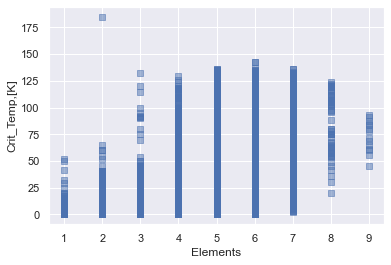

In [65]:
plt.scatter(rds['NUMBER_OF_ELEMENTS'], rds['CRITICAL_TEMP'], marker='s', alpha=0.5)
plt.xlabel('Elements')
plt.ylabel('Crit_Temp,[K]')

Забелязва се, че най-висока температура се постига при 1 сравнително прост материал - състоящ се само от 2 химични елемента и това е:

In [66]:
su_um.loc[(su_um.critical_temp > 150)]

,,H,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
,material,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20573,H2S1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,185.0


## Колонна (стълбова) диаграма:

От този дейтасет искам да видя броя материали спрямо броя елементи.
<br> Първо трябва да изчисля честотата на срещане за всеки брой елементи с функцията <b>value_counts()</b>:

In [67]:
counts = (rds['NUMBER_OF_ELEMENTS'].value_counts())
counts

5    5792
4    4496
3    3895
2    3280
6    2666
7     774
1     285
8      61
9      14
Name: NUMBER_OF_ELEMENTS, dtype: int64

<BarContainer object of 9 artists>

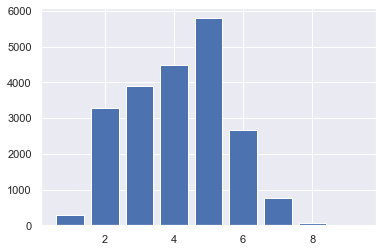

In [68]:
plt.bar(counts.index, height=counts)

## Хистограма:

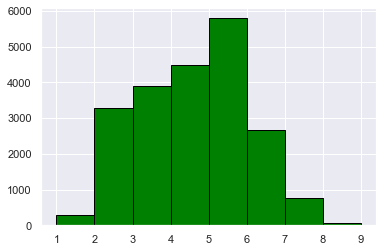

In [69]:
plt.hist(rds['NUMBER_OF_ELEMENTS'], bins=[1,2,3,4,5,6,7,8,9], edgecolor='black', color='green')
plt.grid(True)

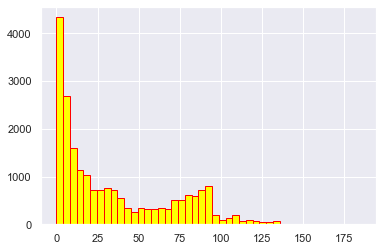

In [70]:
plt.hist(rds['CRITICAL_TEMP'], bins='auto', edgecolor='red', color='yellow')
plt.grid(True)

Както се и очакваше, с нарастване на критичната температура, свръхпроводниците които сме открили намаляват.